In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import json
import ROOT

import random
random.seed(1)

np.random.seed(1)

import os
os.environ['PYTHONHASHSEED']=str(1)

tf.random.set_seed(1)

In [8]:
with open("paths3hits.json") as f:
    paths = json.load(f)

In [46]:
tol = 15
peak_time = 500

evs = int(.8 * len(paths))

x_train = np.array([[paths[ev][:-1]] for ev in range(evs) if paths[ev][-1] != -1])
y_train = np.array([[0 if abs(paths[ev][-1] - peak_time) > tol else 1] for ev in range(evs) if paths[ev][-1] != -1])

# x_train = np.array([[paths[ev][:-1]] for ev in range(evs)])
# y_train = np.array([[0 if abs(paths[ev][-1] - peak_time) > tol else 1] for ev in range(evs)])

x_valid = np.array([[paths[ev][:-1]] for ev in range(evs, len(paths)) if paths[ev][-1] != -1])
y_valid = np.array([[0 if abs(paths[ev][-1] - peak_time) > tol else 1] for ev in range(evs, len(paths)) if paths[ev][-1] != -1])

# x_valid = np.array([[paths[ev][:-1]] for ev in range(evs, len(paths))])
# y_valid = np.array([[0 if abs(paths[ev][-1] - peak_time) > tol else 1] for ev in range(evs, len(paths))])

In [34]:
def create_simple_nn():  
  model = keras.Sequential()
  model.add(layers.Dense(10, activation='relu', name="Hidden_layer_1"))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(20, activation='relu', name="Hidden_layer_2"))
  model.add(layers.Dense(10, activation='relu', name="Hidden_layer_3"))
  model.add(layers.Dense(1, name="Output_layer"))
  model.add(layers.BatchNormalization())

  return model

In [35]:
snn_model = create_simple_nn()
snn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'mse'])

In [36]:

snn = snn_model.fit(x=x_train, y=y_train, batch_size=64, epochs=40, verbose=1, validation_data=(x_valid, y_valid), shuffle=False)

Epoch 1/40
7957/7957 [==============================] - 16s 2ms/step - acc: 0.6416 - loss: 1.5565 - mse: 1.0163 - val_mse: 0.8325 - val_acc: 0.6499 - val_loss: 1.0690
Epoch 2/40
7957/7957 [==============================] - 16s 2ms/step - acc: 0.6432 - loss: 0.8890 - mse: 0.4233 - val_mse: 0.2065 - val_acc: 0.6658 - val_loss: 0.5962
Epoch 3/40
7957/7957 [==============================] - 15s 2ms/step - acc: 0.6636 - loss: 0.5983 - mse: 0.2060 - val_mse: 0.1973 - val_acc: 0.6806 - val_loss: 0.5756
Epoch 4/40
7957/7957 [==============================] - 15s 2ms/step - acc: 0.6794 - loss: 0.5809 - mse: 0.1984 - val_mse: 0.2060 - val_acc: 0.6733 - val_loss: 0.5976
Epoch 5/40
7957/7957 [==============================] - 15s 2ms/step - acc: 0.6838 - loss: 0.5762 - mse: 0.1963 - val_mse: 0.1886 - val_acc: 0.6966 - val_loss: 0.5545
Epoch 6/40
7957/7957 [==============================] - 15s 2ms/step - acc: 0.6931 - loss: 0.5641 - mse: 0.1916 - val_mse: 0.1912 - val_acc: 0.6996 - val_loss: 0.562

In [48]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=64, epochs=40, verbose=1, validation_data=(x_valid, y_valid), shuffle=False)

Epoch 1/40
5274/5274 [==============================] - 35s 7ms/step - acc: 0.6727 - loss: 0.6174 - mse: 0.2130 - val_mse: 0.2051 - val_acc: 0.6877 - val_loss: 0.5979
Epoch 2/40
5274/5274 [==============================] - 32s 6ms/step - acc: 0.6732 - loss: 0.6163 - mse: 0.2127 - val_mse: 0.2085 - val_acc: 0.6771 - val_loss: 0.6051
Epoch 3/40
5274/5274 [==============================] - 28s 5ms/step - acc: 0.6736 - loss: 0.6160 - mse: 0.2126 - val_mse: 0.2045 - val_acc: 0.6896 - val_loss: 0.5965
Epoch 4/40
5274/5274 [==============================] - 31s 6ms/step - acc: 0.6740 - loss: 0.6154 - mse: 0.2122 - val_mse: 0.2043 - val_acc: 0.6890 - val_loss: 0.5960
Epoch 5/40
5274/5274 [==============================] - 15s 3ms/step - acc: 0.6741 - loss: 0.6153 - mse: 0.2123 - val_mse: 0.2043 - val_acc: 0.6888 - val_loss: 0.5959
Epoch 6/40
5274/5274 [==============================] - 10s 2ms/step - acc: 0.6742 - loss: 0.6151 - mse: 0.2122 - val_mse: 0.2070 - val_acc: 0.6814 - val_loss: 0.601

In [42]:
classes = snn_model.predict(x_valid, batch_size=64)

In [43]:
signal = ROOT.TH1F("", "", 100, -1, 1)
background = ROOT.TH1F("", "", 100, -1, 1)

signal.SetLineColor(ROOT.kBlue)
background.SetLineColor(ROOT.kRed)

for real, valid in zip(y_valid, classes):
    if real == 0:
        background.Fill(valid)
    else:
        signal.Fill(valid)

In [44]:
background.Scale(1. / background.Integral())
signal.Scale(1. / signal.Integral())

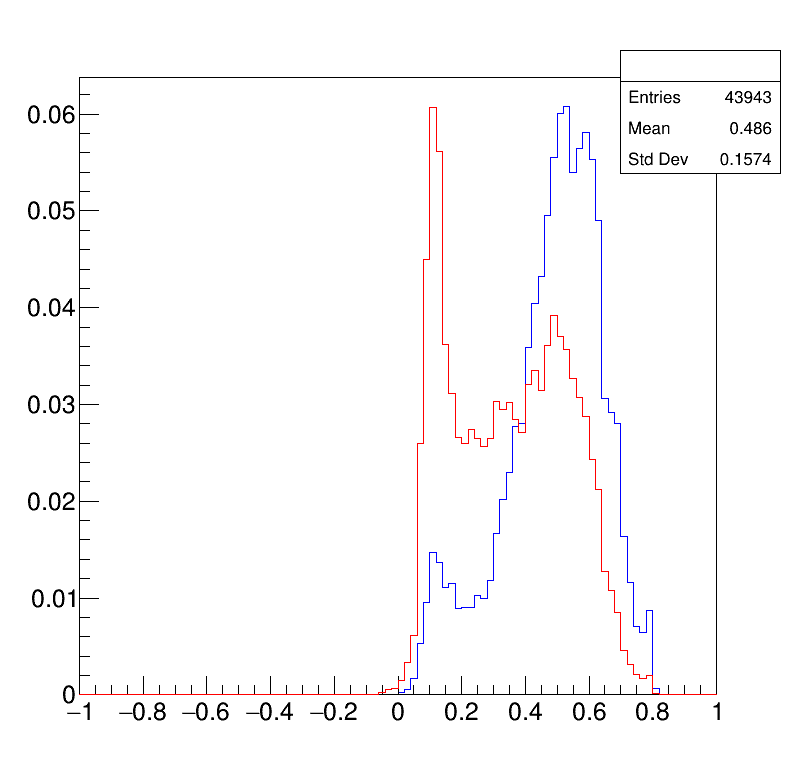

In [45]:
c = ROOT.TCanvas("", "", 800, 800)
signal.Draw("histo, same")
background.Draw("histo, same")


c.Draw()

In [ ]:
snn_model.save("my_model.h5")

### Model to HLS
import hls4ml

from tensorflow.keras.models import load_model

model = load_model("my_model.h5")

config = hls4ml.utils.config_from_keras_model(model, granularity='name')

hls_model = hls4ml.converters.convert_from_keras_model(model, hls_config=config, output_dir='test_prj')

hls_model.write()